# 3. Trajectory planning (Solution)

__Note__ : In this Notebook we use the materials developed previously (geometry, kinematics) to implement a trajectory planner, so __make sure you understand the previous materials before starting this one__. 

We've seen how geometric and kinematic modeling relate mathematically motions in the joint space and motions in the task space. The direct problem always yields a unique solution, that is for given joint coordinates there is only one end-effector outcome. But the inverse problem is somehow more tricky, as there may be several joint configurations describing the same end-effector pose (e.g. redundant robot), or worse, it can happen that no solution is defined at all. In this Notebook, we will use the geometric and kinematic models of the 1R and 2R robots derived previously in order to plan trajectories. The trajectory planner will be python class taking a desired end-effector trajectory $(p_0,\dot{p}_0),...,(p_n,\dot{p}_n)$ as an input and returning the corresponding joint trajectory $(q_0,\dot{q}_0),...,(q_n,\dot{q}_n)$. 

First we import the necessary modules 

In [1]:
## Author: Sebastien
## Date : 22/06/2020

# Import required packages for this notebook
import numpy as np
from matplotlib import pyplot as plt
import IPython
from IPython.display import Image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

np.set_printoptions(precision=4)

# models.py contains the same classes we defined in the Notebooks
#%run kinematics-solution.ipynb
#%run geometry-solution.ipynb
from models import GeometricModel1R, KinematicModel1R, GeometricModel2R, KinematicModel2R

It is convenient to gather the geometric and kinematic models within the same class :

In [2]:
class Model1R:
    '''
    Environment class for the 1R robot kinematics + geometry
    '''
    def __init__(self, L=1.):
        ''' 
        Initialize model parameters
        '''
        # Number of joints
        self.nq = 1
        
        # Geometric Model
        self.geometry = GeometricModel1R(L)
        # Kinematic Model
        self.kinematics = KinematicModel1R(L)
        
    def animate(self, q):
        '''
        Animate a given sequence of joint positions
        '''
        self.geometry.animate(q[0,:])

The `KinematicPlanner` class is initialized with a robot model (such as `Model1R`). The member function `plan` takes a desired end-effector trajectory $(p_0,\dot{p}_0),...,(p_n,\dot{p}_n)$ as an input and computes the corresponding joint space trajectory $(q_0,\dot{q}_0),...,(q_n,\dot{q}_n)$.

__Question__ : Complete the code of the function `plan` below. 

Hint: use member functions of `Model1R.geometry` and `Model1R.kinematics`...

__Answer__ :

In [3]:
# Calculate desired joint trajectory
class KinematicPlanner:
    
    def __init__(self, model=None):
        '''
        Initialize parameters
        '''
        # Model (geometry + kinematics) 
        self.model = model
        # Number of joints
        self.nq = self.model.nq

    def plan(self, p, pdot):
        '''
        Calculates the desired joint trajectory achieving an input end-effector motion
        Input : end-effector positions, velocities
        Output : joint positions, velocities
        '''
        # Get number of steps
        N = np.shape(p)[1]
        # Initialize joint positions and velocities
        q = np.zeros((self.nq, N))
        qdot = np.zeros((self.nq, N))
        # Get plan using IGM and IKM
        for i in range(N):
            # Use IGM to get joint position
            q[:,i] = self.model.geometry.IGM(p[:,i])
            # Use IKM to get joint velocity
            qdot[:,i] = self.model.kinematics.IKM(q[:,i], pdot[:,i])
        return q, qdot

Next we show how to use the planner. We first need to define the desired end-effector trajectory (positions and velocities).

Text(0, 0.5, 'y_p (m)')

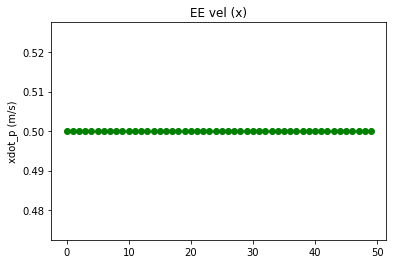

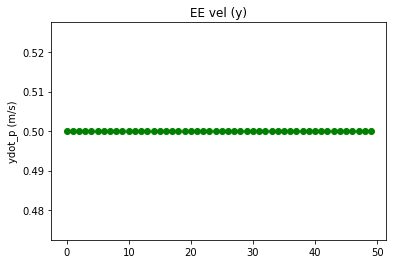

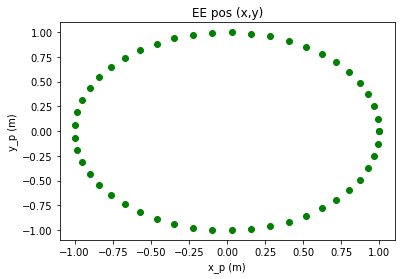

In [4]:
# Number of points
N = 50
# Desired end-effector positions p1,...,pN = circle 
x_p = np.cos(np.linspace(0,1,N)*2*np.pi)
y_p = np.sin(np.linspace(0,1,N)*2*np.pi)
p = np.array([x_p, y_p])
# Desired end-effector velocities pdot1,...,pdotN = constant v
v = .5
pdot = v*np.array([np.ones(N)]*2)

# Plot desired end-effector trajectory
    # xdot
plt.figure()
plt.plot(pdot[0,:], 'go')
plt.title("EE vel (x)")
plt.ylabel("xdot_p (m/s)")
    # ydot
plt.figure()
plt.plot(pdot[1,:], 'go')
plt.title("EE vel (y)")
plt.ylabel("ydot_p (m/s)")
    # p = (x,y)
plt.figure()
plt.plot(p[0,:], p[1,:], 'go')
plt.title("EE pos (x,y)")
plt.xlabel("x_p (m)")
plt.ylabel("y_p (m)")

Now the `KinematicPlanner` class can be used to calculate the corresponding joint space trajectory (joint positions and velocities). 

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABG1W1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABecZYiE
ADf//vbw/gU2O5jQlxHN6J0zH78VuLo0N73OAAADAAA33SOPPLGIDMBRPF7nsmLmccrt1UoZXhLY
p7N9LuGK9NVbfNwYui+erZSJyzg0kp5T0f2VbDgYU86hnYiu9AAAUc0e5O6HqWXnsbPjbwXP0O9E
eEHh3KKtgcflOOhqZYi6ER0ahYHMZx7psIY+mtwar/BeT0x/UFH9+BsSvAj66Um7/CNmmjj2159x
aEnb5MsIbDdcn2os3WB3p43dbf53+Q70w2zH2PeWZkYpJdb7XblrvjGYU2MG8/LbEw4GDGb4+HhN
D9k4X3ChIsYFTEHefc8R5FaQxyqKcZ+wKrdfBJqT9IS2AN1LnUiw6/mNx/LkBhLfdyPl7wa9N53M
k4dsDXHMZchee7UzGO6oN0NC22cQWjJeBP53JkKsEpQ3WZGXkOs9hEDdwltpnV/A6qB/qRpvSIGs
Lo5QzjiXvy7uiaihhuFA4tpMXPP3YpVPAR15j/D+YwsOvArJyjmLBTulKWSz9JrRtiaNfmoPVqKS
gvWdGzi6zuvwwVPc3MYLCK2pPTSq7peTtDTww2A2vAMbNMZfdWUWspM9DPjPjCF0HkA7pMi6/Q3z
UCVDFlYanRTopdNgQcmaPj5Lbp8fogs1TvVLPDzwhL/nRLTK/zZ5LUs5k4ZUswW8bvSp1Anl4oAq
jDJuny3Rx0BFxHxpJuozSCDN69aGromK4zE7mRFFIEQgNLw+1djPcw1UbstteSBr1fIvepGh6YyY
LiLMW+b4n0mEcOSXkHYsQCLh7hMlko5mJvqXHqtL+vaYo7DdTkDB3uLvn/7FUejb6z/TCQ546OB/
GmD539iOdCb4iH+aq8M+kfLoBQhjVs95+f/cOR1+I3l90g75FaxygeEJ2ghrXX+MNrCPcer0/ia4
v4h2NnOhWWg8dSbtc/Q3dvgYp4f4hf37Pxx9oLSc+35Nb6mhlU6oWOYhaJYhOFR6hjXpkjw6SHG6
PLLD7AGj58zkL2vNOpxtSpviQl03txRHyB+zKuttv6vC6jnFrTZPxL5dj1MDXFgok5I4yjOogfCL
xyNsZo33IycqxmciXrFtuFYjgPQtR8Uj4F/+SyziInkK8sze6MXbyc4QJy45U7lu+baD6s5v/6Kz
B+zyq7l8k/H98XQeEwXdl82CN6a9GjeTWVgdrpP2DXKLAo6XF3C4a7y6LT6ehU7PRcNSCbi1LABf
m13U90BbjCLudGyOa/2GQQsPwaniFu/DQomQOGHWl891PLxAXo+ruewebaCECUTyq/0jgQWn+P4a
ide5xHJNBAZrtGlvJXtMXDrsXWkjpo8mJMPBo0tETkJjqnOQ48cfRdOLsUWBa0gJBPEZ/3vB6Utg
B45SVZK4nmiZrBwPl3gL6OpEGc9jNmAx3uS3cgeXqZbqJPhJwkeNvW5Fh6tnNprqDkkqbM/CZL3W
PfR3TwvkCRPoPG/wWiz2xyuf2Me31WSLasHSj20bGJFVYC0brAU6MBhmmL8jvxkO2hWv1T1/hI3b
1RHAfRpdsmCgo5riSfM6TjiIvt6xx9fYWo9nSdtpTr3lAxqAIY3/lVw1oePLTpurquymGklDo9ec
46lXDKljKcKc7UhTVXPTIN7wViIOQylUCNSsKwwl4owIMo7vBVJRela2EC0ALx7fTtKUzS9EGgzr
fauMJS5CMNAib0Wv5m5LRqLhKQCVh0fux5zRIs+VsQ5ggKct6T0+g0uzVhlTQIsevn7uKg6pl+E/
sZMuyPM2QJtwah9fWGIbtvblsO3Rjw9SeTfoE7f0OgCnlHVbwV0eAOPdflvVDthaLRfEMwn941ip
WC7wn0+6y+0z60D2ywqE9SRBl5TC6Qs6IiABGbTLa2BFos0BAYlGk4Chk6sdhDgwG+UIlJGqBalb
OmHtMjbR/xZQmzzGq/8qMrTG1HEpcJJ9I5khT9NwvzaTIaYDrbWGcaDMmDe/6YVGJpTQlEq4+2GL
/IJh4kZTuXPvQe8vRB9JezSCYCwuxeyhhWYGx17s9xpYeBmT4yrf4y9F1/N+ZEubZvmsaviz3WOV
Lqhr5WG6IozoJrl8Mn9sfsx/qr6FOvbf8G44ZOXr/9SDYWQ1H1Ra9pqJl1+dG+FrklUTPrbFe1OE
xZkzxkGCSEca8V+iRXab9tj5mze9bsvaKld1+66vrrZXbsOfoV0IKLo+sB3v64DCxvFKzxptMv4N
yYwR+7Nd//kZQ6kKRKknWnnxr0NvKMGlaJT6OF+45/mGe4k+CIXWyapZi9yy3bw2RGAc4jmbfBjj
xqqqQUhWfeB30Z/qgYzZdhx46HbzlVm55IGFp1MiFfS5ZcZ9OZH07/qOGnHvoWLvpJWJttxod3JQ
/TGXMUTvP6b01avDYoyDhimQH6feAEk4QI/vYpiCS1PtW4VcPmXeskNvw1/oKZkuOE9jIl+Pm8m5
BHOX/BkICPX+aFV1HI6zDGahL6cbqIPZJm2+JniWKNLaL19gs+OyVruvanjKcQb+VXP51CxZcZAS
MV/oTIkc8rRi9nodDI6ZoAzS+lIOO0b+fiayjcPTTyfzpOWUeha0fPBN2qgXZV+ZIyj4sFvRFh1y
VQqbYqPoHTchbSUEyynpHzuU9T5EJLe2s6V70ml2xqB+vbxB90dtEkA5182Yj1xVpsBk3U0jK0CG
z57UBK7qJIJsCDJ6NUU4z+9xXv/dPIN1SOHg4JOpsVgQyuZLjENWLUwL3DbVycE+Ioky8MSLytrs
ztY5lgxoF0mQa1buGYWJwmr9IjEKY840p4ITQbIdlSyI277G65Mvroc9GObbvweJ+MHhXSv4Bp0u
eZAC/b1mtcRyFFbhZXfbXy0o7mN93yajiJNm6tXPSwAV5ztt13qF31lfZ/Ffiw1lKNpqQ0/GnCkY
QC4pmjim1SGOS/suwcWuf

Text(0, 0.5, 'qdot (rad/s)')

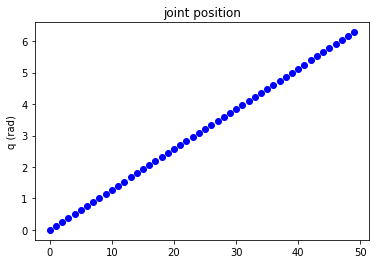

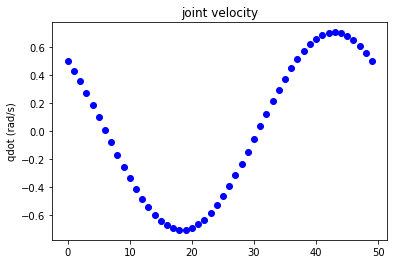

In [5]:
# Create a full model (geometry + kinematics)
model1R = Model1R()
# Create kinematic planner
planner1 = KinematicPlanner(model1R)
# Plan
q, qdot = planner1.plan(p, pdot)
# Animate 
model1R.animate(q)
# Plot the joint trajectories
plt.figure()
plt.plot(q[0,:], 'bo')
plt.title("joint position")
plt.ylabel("q (rad)")
    # qdot
plt.figure()
plt.plot(qdot[0,:], 'bo')
plt.title("joint velocity")
plt.ylabel("qdot (rad/s)")

__Question__ : Implement the `Model2R` based on the `Model1R` example (you can complete the code below). Test your implementation by generating a trajectory using the trajectory planner.

__Answer__ : 

In [6]:
class Model2R:
    '''
    Environment class for the 2R robot kinematics + geometry
    '''
    def __init__(self, L1=1., L2=1.):
        ''' 
        Initialize model parameters
        '''
        # Number of joints
        self.nq = 2
        
        # Geometry + kinematics
        self.geometry = GeometricModel2R(L1, L2)
        self.kinematics = KinematicModel2R(L1, L2)
        
    def animate(self, q):
        '''
        Animate a given sequence of joint positions
        '''
        self.geometry.animate(q)

Now we calculate the joint trajectory using the planner (for the same desired end-effector trajectory as before) + animation and plots.

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABSG21kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABRHZYiE
AC///vau/MsrRwuVLh1Ze7NR8uhJcv2IMH1oAAADAADVayF8oYJVUBByf4O5YtZ6qGZLtT17Eogp
jCCTv3ncxYbd/iUaemh41E8s/58OpW3qZfUSgOEKBL/FwAAVkkNY/TuUMdzGZjXRqm///is42csw
2GRsDZlgfqbtbKDrl33R3UyHXGK4fjlQtRTi+K+sRCXJWD4gwfaScWKb8rN5RSQH/EzL0te9XXON
dLxmUR06/2kVxy4b4OXQuteBVqWFTWsdirxF2PG+YHZkVBgwnjR//Q//7OVm/tTIIPeL613X/PeG
8WB0k2MrC45/VBIpvXfvIJX1MPO9HOvjSPvVM0ybNrLvueP0V7fiyJ/IDB3QV4uVn5D26lBWOnwH
sZrGCF6hsNdgDMwPmw8B06nMptgn+b8RODf6aLGAgPpbcCAm4DvfCwZajWi49r3DxbBJ8AlgYM/t
7likpzIDUiPHrHav3saDRG4wEYMUoVsUDd3lxcg//Civ0IB1S0m6vV82PkpYXibr+uXrZ+wgt+2I
r+vdFpsNFzIfkUEFwLu6/44VRrUAPosNTnagb//VmXqwK3zP9hwVOGAXykbLB2EtE7tXNwn6eN3s
41/S1zC5iHzb0nRbgQx5GcN4ZHflEvHv1AIIfrW8bBra0F5jy8LH9CvOKcJM8asiPwtn1+fmFzAr
TO4z2FfJlKIzg5/DXTsamPGPQpvDvCBZlsWv/7q9+II89yRw0sjj6Ev007DHTc4Kk/cipiBktnHD
NIQBjViqgDsy5vFst3si8wpTif3eEkHtaBZFcJBXaR0HNJkKuu/e6pUcGS32GYxusUZfvq+gpaRs
+Uah/12kfREuOf+64Q2tu4RtDGhGrKpgVtcfyfVL1W1Sz1qI46ljbQPWFr26KBxSXW7HG8o05PiP
w3owMgo4oVSjEUhLqyQCKaQmZIXJm/FYMRk0a2F2NeOHafOqfVX7Ret9zenxn6Ko/8cX2GsY++40
4yp/4ZcRvLZ1BFfETBo0ZftLw73Fequibq1zoUy55rqRUk+KCpOR890Lu2bJDKdTUTZDuDOILbD6
+fa6OKS9AI3gGbw9zXoo6D2gvH3ZWHjryFmQMRNE1hjSXNQ1k8LwBdeATjxYN+qwNSBcWQByFpfZ
bWtn1Td/2xVJAORbN79MI7ZpCtWgJgz1lA8X0KkjY6/38q/CjzaXR+dMIyFIdB0lTAlHMTtBJxxk
8qXrywppmmNRflEgF2rGzCs+FYNA7nN3/CVwDX+Yg56xXu0vLNP3QptjYyvLS9g6v3MwkTBbGupa
mHENlJcENqM5pYWZsiODzjdgRbBLG3xc76KGLhXnApRxf8XMDpzdijuLAoz0FQclszXFKxyjbcBb
B+AAkCwN0biXyMpd/vBezhFWtp3PoovOUeSQFWhFcqyqKIE/SenluzrKUxISCL9Xzi/tqQbDEE8u
wbX2efykzaMyXCrtIMhKdOQV9dQzlMw0L3jslPu+aZaIiobgfWrCQqk/vcex3xwYUEZW91ccR3aP
EV91rlEm9M9iLaEq8CdTgtK46vgjPveejKZL/GwFSc79Y6SO3VHywxkasm3Y2RFuD+7wd+efnAbw
cpLzmo4eRC/qx0uTfOalR6E172at9zMiDwE+9ACILa4L3VJfWYhDPVFMsw4XufhYctKCBDpN7v3L
WCmJday/zwl6Iz3w3YqVLBVlMq434i1SAIjTFQwloc7kaQK53Mnccz1+9S18T2T++d+gr4hb7qPh
nvq5L/Ujf9mBJB9dxaHdk4ZFqw5UhAaq0kPPZ0K659IUkqpYLfkzvHu7b459RqcdyGA/VF4+nCBs
Z7WB/n5pC+3gMlPzVmuUgWumR6z6W+vANt5dw+IIKxI3cOP+qX6CrX7SI7XgZhdZaNVDhwaBZK8x
3Bi0zaQBqLeOK6Vxc9hNvUUFiq5DnKBs3rBhHLqOTIr8D7pwKh46ipX/9VXko9cNqJ5B1Bu0vsPy
Un9w70Rpf2gvUfASfS6bj/0ZVXnKt4q02SLEGcyVMM+w51Ray433jOcoolMwxcc2xq/eEnFGk7nG
5n7caAFUkei7YaAFxKvnJagUk6ALiDrWS1e5YpOy0yXXFtGBfRZ6pC+wSMtKm0TKabTu3YRDonXw
bHkHAHBzI2aeHS1dzJM/y7Ljuw8eQaXY4r9IhxkEVwo3yTdQQlzY4g13tH8++AeVUVvB4R93TAeJ
Dn17DvBgxqb/8WG/5JjUsnDv7/PotZBd6mXJpb46HSnkQmP0IsJcaUTkUtqrxnQSf4xpjlQYXf7A
VIMNkRWfTAgaMMSFlh2e+r2TQ3WjdKE1N6kPJOVjcfCt+g81RvQrfWHepOpV52LY6e9CtO9UHbXc
PAD+LiInn5+DEjYX7EryvrXBFqHemgUAMgArfdmQbXPIzghHDwNqzdkM+7oiN9htOAGxl9TVTiPy
ME9yJDQ/qbalcXw+iZ3n261jjb0MMo7uuZwsaugqBeR9V0flftFVmatF5ixpBPq8wLzEH7gOQYhL
YjkVoiIryevpIknyT3t/QLy7ruxbzfBl2SQOnIzr9zJHVim8qaalwjHDMKEzM2Mhz2nnCG34Lp8l
wPa9EdEibVH4irSN8zwldLoZry4WB15HSP2AI6CvtU28u6F60jlfAOb0fCV/mvktLpl2jjH+9Q/z
tA09/ZpKW/dEemC1Erg+wB4FcZtB/+FernsB+75WE5yFn18NpYVsp48ut6wUmnMdDeJXnrnP/Wmj
TLk9pWhinz1k+9BXmpZFj4mJphFenNPsfmG/6uu8CiswcgtqG2UJjRfVzbgrxwpe/ndhJdD5QtTU
UC/ZNXNnWUCm4SvzF3pnGb3nAjIPLA3hMUdsfoTNh4vhHLqogOV+d4ulw6zzS9/vpeXiku6GDz6V
PCpeSmeUQo5qMmMTqqQA2

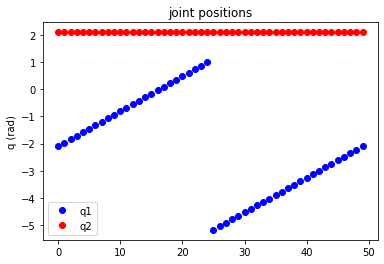

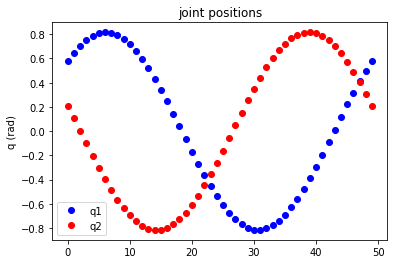

In [7]:
# Create a full model (geometry + kinematics) of the 2R robot
model2R = Model2R()
# Create planner
planner2 = KinematicPlanner(model2R)
# Plan
q, qdot = planner2.plan(p, pdot)
# Animate
model2R.animate(q)
# Plot the joint trajectories
    # q
plt.figure()
plt.plot(q[0,:], 'bo', label='q1')
plt.title("joint positions")
plt.ylabel("q (rad)")
plt.plot(q[1,:], 'ro', label='q2')
plt.legend()
    # qdot
plt.figure()
plt.plot(qdot[0,:], 'bo', label='q1')
plt.title("joint positions")
plt.ylabel("q (rad)")
plt.plot(qdot[1,:], 'ro', label='q2')
plt.legend()

Congratulations ! You completed the geometry and kinematics part. The next Notebook will introduce the dynamic model. While the kinematic model describes motions in terms of velocities, it doesn't involve what _causes_ of those motions. The dynamic model completes the picture by including mechanical efforts applied on the robot. More specifically, it relates forces and torques in the actuators to joint space motions.